In [2]:
#1 ############## Base Code to Run for DataFiles Input into DataFrames ####################

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'


# Combine the CSV files into NEPH, PSAP and PASS DataFrames and the Lab Burn Data to Dataframes
import os
import pandas as pd
import glob
#NEPH
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\NEPHDRY\ascii-csv'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
NEPH_df0 = pd.concat(li, axis=0, ignore_index=True)
# NEPH_df0.to_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\NEPHDRY\NEPH_df0.csv", index=False)

#PSAP
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\PSAP\ascii-csv'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
PSAP_df0 = pd.concat(li, axis=0, ignore_index=True)
# PSAP_df0.to_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\PSAP\PSAP_df0.csv", index=False)

#PASS
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\PASS3W\ascii-csv'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
PASS_df0 = pd.concat(li, axis=0, ignore_index=True)
# PASS_df0.to_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\PASS3W\PASS_df0.csv", index=False)

#ACSM
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\ACSM\ascii-csv'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
ACSM_df0 = pd.concat(li, axis=0, ignore_index=True)
# ACSM_df0.to_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\ACSM\ACSM_df0.csv", index=False)


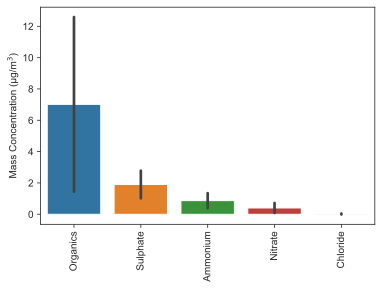

In [3]:
#1.1 ############## ACSM Composition Barplot ####################

ACSM_df = ACSM_df0[["time", "total_organics_CDCE", "sulfate_CDCE", "ammonium_CDCE", "nitrate_CDCE", "chloride_CDCE"]]
# display(ACSM_df.mean(), ACSM_df.std())

fig, ax = plt.subplots()

sns.barplot(data=ACSM_df,ci="sd")
plt.xticks(rotation=90)
plt.ylabel("Mass Concentration (\u03BCg/m$^3$)")
ax.set_xticklabels(["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride"])
plt.savefig('ACMS_Composition_Plot.tiff', bbox_inches='tight', dpi=600) #, dpi=600 transparent=True
plt.show()

In [4]:
#2 ############## Code to Replicate the Dubey 2015 Poster Results ####################

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_532nm", "absorption_coefficient_781nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics_CDCE", "sulfate_CDCE", "ammonium_CDCE", "nitrate_CDCE", "chloride_CDCE"]]


# display(PASS_df.head(), PSAP_df.head(), NEPH_df.head())


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df], axis=1)
Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
Combined_df[Combined_df["absorption_coefficient_405nm"]>15] = np.nan
Combined_df[Combined_df["absorption_coefficient_532nm"]>15] = np.nan
Combined_df[Combined_df["absorption_coefficient_781nm"]>15] = np.nan
Combined_df.dropna(inplace=True)

# Compute Angstrom Exponents for PASS Data
Combined_df["AE_PASS_405_532"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_532nm) / np.log(405/532)
Combined_df["AE_PASS_532_781"] = -1*np.log(Combined_df.absorption_coefficient_532nm/Combined_df.absorption_coefficient_781nm) / np.log(532/781)

# Extrapolate PASS Data to PSAP Wavelengths(467,530,660)
Combined_df["Ba_PASS@467"] = Combined_df["absorption_coefficient_405nm"]*(467/405)**(-1*Combined_df["AE_PASS_405_532"])
Combined_df["Ba_PASS@530"] = Combined_df["absorption_coefficient_532nm"]*(530/532)**(-1*Combined_df["AE_PASS_405_532"])
Combined_df["Ba_PASS@660"] = Combined_df["absorption_coefficient_781nm"]*(660/781)**(-1*Combined_df["AE_PASS_532_781"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["AE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["AE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)

# Extrapolate NEPH Data to PSAP Wavelengths(467,530,660)
Combined_df["Bs_NEPH@467"] = Combined_df["Bs_B_Dry_Neph3W"]*(467/450)**(-1*Combined_df["AE_NEPH_450_550"])
Combined_df["Bs_NEPH@530"] = Combined_df["Bs_G_Dry_Neph3W"]*(530/550)**(-1*Combined_df["AE_NEPH_450_550"])
Combined_df["Bs_NEPH@660"] = Combined_df["Bs_R_Dry_Neph3W"]*(660/700)**(-1*Combined_df["AE_NEPH_550_700"])



In [4]:
Combined_df.absorption_coefficient_405nm.mean()

1.807445718966631

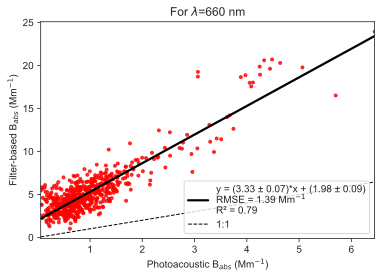

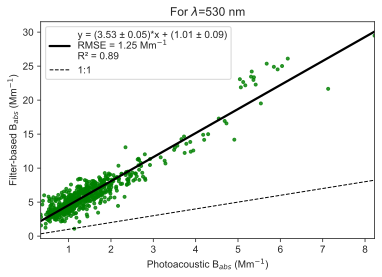

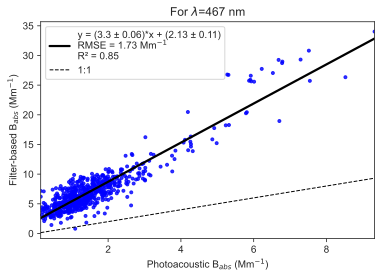

In [5]:
#2Continued: ResultsSaving ############## Code to PSAP vs PASS Plots@ Different Wavelenghts  ####################

# Plot PSAP vs PASS Scatter with Regression line for all 3 Wavelengths ## Change wavelenghth and _R/G/B and colour

##########################
#2.1 Red Wavelength Plot
from scipy.optimize import curve_fit
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def linear_reg(X, m, c):
    x1 = X
    return (m*(x1)+c)

X = Combined_df["Ba_PASS@660"] #
y = Combined_df["Ba_R_PSAP3W"] #

popt, pcov = curve_fit(linear_reg, X, y)
popt_std2 = (np.sqrt(np.diag(pcov)))
m, c= popt

residuals = y - linear_reg(X, m, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared2 = 1 - (ss_res / ss_tot)
rmse2 = rmse(linear_reg(X, m, c), y)

plt.title("For $\lambda$=660 nm")
sns.regplot(x="Ba_PASS@660", y="Ba_R_PSAP3W", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black", "label":"y = ("+str(np.round(m, 2))+" ± "+str(np.round(popt_std2[0], 2))+")*x + ("+str(np.round(c, 2))+" ± "+str(np.round(popt_std2[1], 2))+")\nRMSE = "+str(np.round(rmse2, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared2, 2))}, marker=".", ci=None) #
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Filter-based B$_{abs}$ (Mm$^{-1}$)")

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS@660nm.tiff', bbox_inches='tight', dpi=600) #dpi = 600
plt.show()

##########################
#2.2 Green Wavelength Plot

from scipy.optimize import curve_fit
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def linear_reg(X, m, c):
    x1 = X
    return (m*(x1)+c)

X = Combined_df["Ba_PASS@530"] #
y = Combined_df["Ba_G_PSAP3W"] #

popt, pcov = curve_fit(linear_reg, X, y)
popt_std2 = (np.sqrt(np.diag(pcov)))
m, c= popt

residuals = y - linear_reg(X, m, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared2 = 1 - (ss_res / ss_tot)
rmse2 = rmse(linear_reg(X, m, c), y)

plt.title("For $\lambda$=530 nm")
sns.regplot(x="Ba_PASS@530", y="Ba_G_PSAP3W", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black", "label":"y = ("+str(np.round(m, 2))+" ± "+str(np.round(popt_std2[0], 2))+")*x + ("+str(np.round(c, 2))+" ± "+str(np.round(popt_std2[1], 2))+")\nRMSE = "+str(np.round(rmse2, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared2, 2))}, marker=".", ci=None) #
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Filter-based B$_{abs}$ (Mm$^{-1}$)")

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS@530nm.tiff', bbox_inches='tight', dpi=600) #dpi = 600
plt.show()


##########################
#2.3 Blue Wavelength Plot

from scipy.optimize import curve_fit
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def linear_reg(X, m, c):
    x1 = X
    return (m*(x1)+c)

X = Combined_df["Ba_PASS@467"] #
y = Combined_df["Ba_B_PSAP3W"] #

popt, pcov = curve_fit(linear_reg, X, y)
popt_std2 = (np.sqrt(np.diag(pcov)))
m, c= popt

residuals = y - linear_reg(X, m, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared2 = 1 - (ss_res / ss_tot)
rmse2 = rmse(linear_reg(X, m, c), y)

plt.title("For $\lambda$=467 nm") #
sns.regplot(x="Ba_PASS@467", y="Ba_B_PSAP3W", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black", "label":"y = ("+str(np.round(m, 2))+" ± "+str(np.round(popt_std2[0], 2))+")*x + ("+str(np.round(c, 2))+" ± "+str(np.round(popt_std2[1], 2))+")\nRMSE = "+str(np.round(rmse2, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared2, 2))}, marker=".", ci=None) #
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Filter-based B$_{abs}$ (Mm$^{-1}$)")

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS@467nm.tiff', bbox_inches='tight', dpi=600)
plt.show()





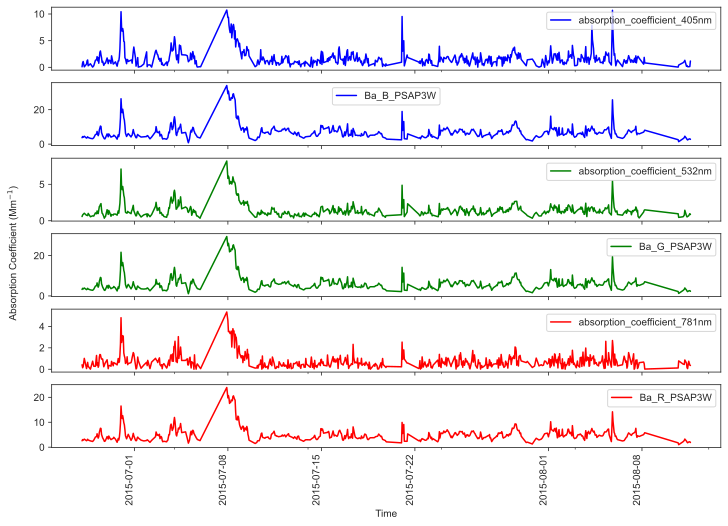

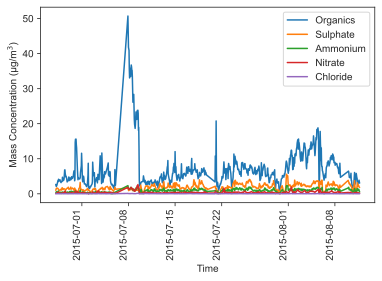

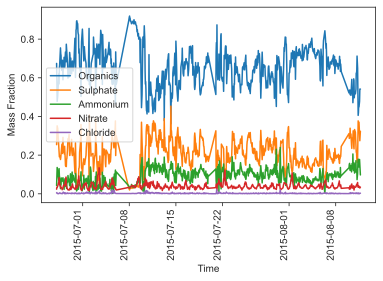

In [6]:
#2.4 ############## Plot PASS&PSAP Data TimeSeries ####################
sns.set_style("ticks")


timeseries_df = Combined_df[["absorption_coefficient_405nm", "Ba_B_PSAP3W", "absorption_coefficient_532nm", "Ba_G_PSAP3W", "absorption_coefficient_781nm", "Ba_R_PSAP3W"]]
axes = timeseries_df.plot(subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time", color=["b", "b", "g", "g", "r", "r"])
fig=axes[0,0].figure
# fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
fig.text(0.08,0.5, "Absorption Coefficient (Mm$^{-1}$)", ha="center", va="center", rotation=90)
plt.xticks(rotation=90)

plt.savefig('TimeSeries_PASS&PSAP.tiff', bbox_inches='tight', dpi=600)
plt.show()


#2.5 ############## ACSM Composition Timeseries ####################

ACSM_timeseries_df = ACSM_1hr_df
# ACSM_timeseries_df["time"] = Combined_df["time"]
ACSM_timeseries_df[ACSM_timeseries_df<=0] = np.nan # For removing negative abs values
ACSM_timeseries_df.dropna(inplace=True)

ACSM_timeseries_df.plot()
plt.xticks(rotation=90)
plt.ylabel("Mass Concentration (\u03BCg/m$^3$)")
plt.xlabel("Time")
plt.legend(labels=["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride"])
plt.savefig('ACSM_TimeSeries.tiff', bbox_inches='tight', dpi=600)
plt.show()


#2.6 ############## ACSM Mass Fraction Timeseries ####################

# sns.set_style("white")
# ACSM_timeseries_df = ACSM_1hr_df
# # ACSM_timeseries_df["time"] = Combined_df["time"]
# ACSM_timeseries_df[ACSM_timeseries_df<=0] = np.nan # For removing negative abs values
# ACSM_timeseries_df.dropna(inplace=True)

ACSM_timeseries_df.columns
# ACSM_timeseries_df["total_CDCE"] =  ACSM_timeseries_df["total_organics_CDCE"]+ACSM_timeseries_df["sulfate_CDCE"]+ACSM_timeseries_df["ammonium_CDCE"]+ACSM_timeseries_df["nitrate_CDCE"]+ACSM_timeseries_df["chloride_CDCE"]
ACSM_MF_timeseries_df = pd.DataFrame()
ACSM_MF_timeseries_df["Organic_fraction"] = ACSM_timeseries_df["total_organics_CDCE"] / (ACSM_timeseries_df["total_organics_CDCE"]+ACSM_timeseries_df["sulfate_CDCE"]+ACSM_timeseries_df["ammonium_CDCE"]+ACSM_timeseries_df["nitrate_CDCE"]+ACSM_timeseries_df["chloride_CDCE"])
ACSM_MF_timeseries_df["Sulphate_fraction"] = ACSM_timeseries_df["sulfate_CDCE"] / (ACSM_timeseries_df["total_organics_CDCE"]+ACSM_timeseries_df["sulfate_CDCE"]+ACSM_timeseries_df["ammonium_CDCE"]+ACSM_timeseries_df["nitrate_CDCE"]+ACSM_timeseries_df["chloride_CDCE"])
ACSM_MF_timeseries_df["Ammonium_fraction"] = ACSM_timeseries_df["ammonium_CDCE"] / (ACSM_timeseries_df["total_organics_CDCE"]+ACSM_timeseries_df["sulfate_CDCE"]+ACSM_timeseries_df["ammonium_CDCE"]+ACSM_timeseries_df["nitrate_CDCE"]+ACSM_timeseries_df["chloride_CDCE"])
ACSM_MF_timeseries_df["Nitrate_fraction"] = ACSM_timeseries_df["nitrate_CDCE"] / (ACSM_timeseries_df["total_organics_CDCE"]+ACSM_timeseries_df["sulfate_CDCE"]+ACSM_timeseries_df["ammonium_CDCE"]+ACSM_timeseries_df["nitrate_CDCE"]+ACSM_timeseries_df["chloride_CDCE"])
ACSM_MF_timeseries_df["Chloride_fraction"] = ACSM_timeseries_df["chloride_CDCE"] / (ACSM_timeseries_df["total_organics_CDCE"]+ACSM_timeseries_df["sulfate_CDCE"]+ACSM_timeseries_df["ammonium_CDCE"]+ACSM_timeseries_df["nitrate_CDCE"]+ACSM_timeseries_df["chloride_CDCE"])

ACSM_MF_timeseries_df.plot()
plt.xticks(rotation=90)
plt.ylabel("Mass Fraction")
plt.xlabel("Time")
plt.legend(labels=["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride"])
plt.savefig('ACSM_MassFraction_TimeSeries.tiff', bbox_inches='tight', dpi=600)
plt.show()

In [7]:
display(axes) # Way to go for changin the lengend variable names in the plot

array([[<AxesSubplot:xlabel='Time'>],
       [<AxesSubplot:xlabel='Time'>],
       [<AxesSubplot:xlabel='Time'>],
       [<AxesSubplot:xlabel='Time'>],
       [<AxesSubplot:xlabel='Time'>],
       [<AxesSubplot:xlabel='Time'>]], dtype=object)

In [8]:
#3 ############## Code to just Apply Unrevised Virkkula Algo using precomputed Virkkula(2010) Coefficients ####################

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_532nm", "absorption_coefficient_781nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics_CDCE", "sulfate_CDCE", "ammonium_CDCE", "nitrate_CDCE", "chloride_CDCE"]]


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df], axis=1)
Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
Combined_df[Combined_df["absorption_coefficient_405nm"]>15] = np.nan
Combined_df[Combined_df["absorption_coefficient_532nm"]>15] = np.nan
Combined_df[Combined_df["absorption_coefficient_781nm"]>15] = np.nan
Combined_df.dropna(inplace=True)


# Compute Total Organic + Inorganic Particle concentration
Combined_df["total_CDCE"] =  Combined_df["total_organics_CDCE"]+Combined_df["sulfate_CDCE"]+Combined_df["ammonium_CDCE"]+Combined_df["nitrate_CDCE"]+Combined_df["chloride_CDCE"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AE_PASS_405_532"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_532nm) / np.log(405/532)
Combined_df["AE_PASS_532_781"] = -1*np.log(Combined_df.absorption_coefficient_532nm/Combined_df.absorption_coefficient_781nm) / np.log(532/781)

# Extrapolate PASS Data to PSAP Wavelengths(467,530,660)
Combined_df["Ba_PASS@467"] = Combined_df["absorption_coefficient_405nm"]*(467/405)**(-1*Combined_df["AE_PASS_405_532"])
Combined_df["Ba_PASS@530"] = Combined_df["absorption_coefficient_532nm"]*(530/532)**(-1*Combined_df["AE_PASS_405_532"])
Combined_df["Ba_PASS@660"] = Combined_df["absorption_coefficient_781nm"]*(660/781)**(-1*Combined_df["AE_PASS_532_781"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["AE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["AE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)

# Extrapolate NEPH Data to PSAP Wavelengths(467,530,660)
Combined_df["Bs_NEPH@467"] = Combined_df["Bs_B_Dry_Neph3W"]*(467/450)**(-1*Combined_df["AE_NEPH_450_550"])
Combined_df["Bs_NEPH@530"] = Combined_df["Bs_G_Dry_Neph3W"]*(530/550)**(-1*Combined_df["AE_NEPH_450_550"])
Combined_df["Bs_NEPH@660"] = Combined_df["Bs_R_Dry_Neph3W"]*(660/700)**(-1*Combined_df["AE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@467"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@530"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@660"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@467"] = 0.015
Combined_df["s@530"] = 0.017
Combined_df["s@660"] = 0.022

Combined_df["f(Tr)@467"] = ( Combined_df["Ba_PASS@467"] + Combined_df["s@467"]*Combined_df["Bs_NEPH@467"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@530"] = ( Combined_df["Ba_PASS@530"] + Combined_df["s@530"]*Combined_df["Bs_NEPH@530"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@660"] = ( Combined_df["Ba_PASS@660"] + Combined_df["s@660"]*Combined_df["Bs_NEPH@660"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute Approximate w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PSAP_abs)
Combined_df["w0@467"] = (Combined_df["Bs_NEPH@467"]/(Combined_df["Bs_NEPH@467"] + Combined_df["Ba_PASS@467"]))
Combined_df["w0@530"] = (Combined_df["Bs_NEPH@530"]/(Combined_df["Bs_NEPH@530"] + Combined_df["Ba_PASS@530"]))
Combined_df["w0@660"] = (Combined_df["Bs_NEPH@660"]/(Combined_df["Bs_NEPH@660"] + Combined_df["Ba_PASS@660"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@467"] = Combined_df["w0@467"]*Combined_df["ln(Tr)@467"]
Combined_df["w0*ln(Tr)@530"] = Combined_df["w0@530"]*Combined_df["ln(Tr)@530"]
Combined_df["w0*ln(Tr)@660"] = Combined_df["w0@660"]*Combined_df["ln(Tr)@660"]

# display(Combined_df.head())
# display(Combined_df.columns)




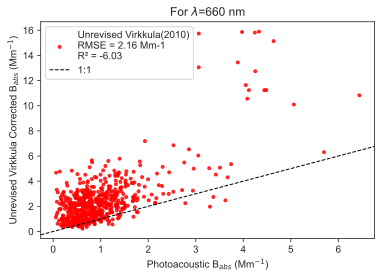

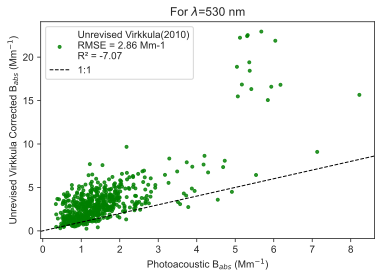

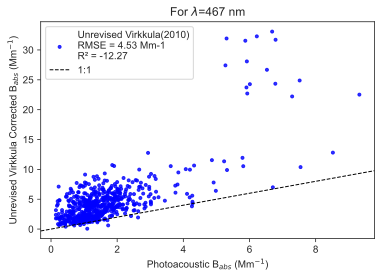

In [9]:
#3SavingResults: Unrevised Virkkula's Predictions for Diffferent Wavelengths
#  // Change wavelenght#, _RBG# Code, "Blue_Coef" and Plot "Colour" to get different results

################################
# 3.1 Red Wavelength Plot
# Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_R_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@660"]
Tr = Combined_df["transmittance_R"]
Combined_df["Ba_Virkkula_Unrevised@660"] = 1

Blue_Coef = [0.377, -0.640, 1.16, -0.63]
Green_Coef = [0.358, -0.640, 1.17, -0.71]
Red_Coef = [0.352, -0.674, 1.14, -0.72]

k0, k1, h0, h1 = Red_Coef ####################Need to be changed for different Wavelength#################

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@660"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@660"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula_Unrevised@660"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@660"])

# display(Combined_df["Ba_Virkkula@660"])
# display(f(Combined_df["Ba_Virkkula@660"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@660"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@660"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@660"] - Combined_df["Ba_Virkkula_Unrevised@660"]
ss_Res = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@660"]-np.mean(Combined_df["Ba_PASS@660"]))**2)

Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Virkkula_Unrevised@660"], Combined_df["Ba_PASS@660"])

metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Unrevised_Virkkula Prediction"])
# display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
plt.title("For $\lambda$=660 nm") #
sns.regplot(x="Ba_PASS@660", y="Ba_Virkkula_Unrevised@660", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Unrevised Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# plt.scatter(Combined_df["Ba_PASS@660"], Combined_df["Ba_Virkkula_Unrevised@660"], label="Unrevised_Virkkula(2010) Predictions@660nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Unrevised Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('Virkkula_Unrevised@660.tiff', bbox_inches='tight', dpi=600)
plt.show()



#########################################
# 3.2 Green Wavelength Plot
# Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_G_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@530"]
Tr = Combined_df["transmittance_G"]
Combined_df["Ba_Virkkula_Unrevised@530"] = 1

Blue_Coef = [0.377, -0.640, 1.16, -0.63]
Green_Coef = [0.358, -0.640, 1.17, -0.71]
Red_Coef = [0.352, -0.674, 1.14, -0.72]

k0, k1, h0, h1 = Green_Coef ####################Need to be changed for different Wavelength#################

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_G_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@530"], Tr = Combined_df["transmittance_G"], s = Combined_df["s@530"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula_Unrevised@530"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@530"])

# display(Combined_df["Ba_Virkkula@660"])
# display(f(Combined_df["Ba_Virkkula@660"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@660"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@660"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@530"] - Combined_df["Ba_Virkkula_Unrevised@530"]
ss_Res = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@530"]-np.mean(Combined_df["Ba_PASS@530"]))**2)

Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Virkkula_Unrevised@530"], Combined_df["Ba_PASS@530"])

metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Unrevised_Virkkula Prediction"])
# display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
plt.title("For $\lambda$=530 nm") #
sns.regplot(x="Ba_PASS@530", y="Ba_Virkkula_Unrevised@530", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Unrevised Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# plt.scatter(Combined_df["Ba_PASS@660"], Combined_df["Ba_Virkkula_Unrevised@660"], label="Unrevised_Virkkula(2010) Predictions@660nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Unrevised Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('Virkkula_Unrevised@530.tiff', bbox_inches='tight', dpi=600)
plt.show()


#########################################
# 3.3 Blue Wavelength Plot
# Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_B_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@467"]
Tr = Combined_df["transmittance_B"]
Combined_df["Ba_Virkkula_Unrevised@467"] = 1

Blue_Coef = [0.377, -0.640, 1.16, -0.63]
Green_Coef = [0.358, -0.640, 1.17, -0.71]
Red_Coef = [0.352, -0.674, 1.14, -0.72]

k0, k1, h0, h1 = Blue_Coef ####################Need to be changed for different Wavelength#################

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_B_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@467"], Tr = Combined_df["transmittance_B"], s = Combined_df["s@467"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula_Unrevised@467"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@467"])

# display(Combined_df["Ba_Virkkula@660"])
# display(f(Combined_df["Ba_Virkkula@660"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@660"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@660"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@467"] - Combined_df["Ba_Virkkula_Unrevised@467"]
ss_Res = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@467"]-np.mean(Combined_df["Ba_PASS@467"]))**2)

Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Virkkula_Unrevised@467"], Combined_df["Ba_PASS@467"])

metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Unrevised_Virkkula Prediction"])
# display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
plt.title("For $\lambda$=467 nm") #
sns.regplot(x="Ba_PASS@467", y="Ba_Virkkula_Unrevised@467", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Unrevised Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# plt.scatter(Combined_df["Ba_PASS@660"], Combined_df["Ba_Virkkula_Unrevised@660"], label="Unrevised_Virkkula(2010) Predictions@660nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Unrevised Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")
# # Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig('Virkkula_Unrevised@467.tiff', bbox_inches='tight', dpi=600)
plt.show()

In [10]:
#4 ############## Code to compute Virukulla Coefficients using DOE Data ####################


from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_532nm", "absorption_coefficient_781nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics_CDCE", "sulfate_CDCE", "ammonium_CDCE", "nitrate_CDCE", "chloride_CDCE"]]


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df], axis=1)
Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
Combined_df[Combined_df["absorption_coefficient_405nm"]>15] = np.nan
Combined_df[Combined_df["absorption_coefficient_532nm"]>15] = np.nan
Combined_df[Combined_df["absorption_coefficient_781nm"]>15] = np.nan
Combined_df.dropna(inplace=True)


# Compute Total Organic + Inorganic Particle concentration
Combined_df["total_CDCE"] =  Combined_df["total_organics_CDCE"]+Combined_df["sulfate_CDCE"]+Combined_df["ammonium_CDCE"]+Combined_df["nitrate_CDCE"]+Combined_df["chloride_CDCE"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AE_PASS_405_532"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_532nm) / np.log(405/532)
Combined_df["AE_PASS_532_781"] = -1*np.log(Combined_df.absorption_coefficient_532nm/Combined_df.absorption_coefficient_781nm) / np.log(532/781)

# Extrapolate PASS Data to PSAP Wavelengths(467,530,660)
Combined_df["Ba_PASS@467"] = Combined_df["absorption_coefficient_405nm"]*(467/405)**(-1*Combined_df["AE_PASS_405_532"])
Combined_df["Ba_PASS@530"] = Combined_df["absorption_coefficient_532nm"]*(530/532)**(-1*Combined_df["AE_PASS_405_532"])
Combined_df["Ba_PASS@660"] = Combined_df["absorption_coefficient_781nm"]*(660/781)**(-1*Combined_df["AE_PASS_532_781"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["AE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["AE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)

# Extrapolate NEPH Data to PSAP Wavelengths(467,530,660)
Combined_df["Bs_NEPH@467"] = Combined_df["Bs_B_Dry_Neph3W"]*(467/450)**(-1*Combined_df["AE_NEPH_450_550"])
Combined_df["Bs_NEPH@530"] = Combined_df["Bs_G_Dry_Neph3W"]*(530/550)**(-1*Combined_df["AE_NEPH_450_550"])
Combined_df["Bs_NEPH@660"] = Combined_df["Bs_R_Dry_Neph3W"]*(660/700)**(-1*Combined_df["AE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@467"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@530"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@660"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y // 0.013, 0.016, 0.021 are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@467"] = 0.013
Combined_df["s@530"] = 0.016
Combined_df["s@660"] = 0.021

Combined_df["f(Tr)@467"] = ( Combined_df["Ba_PASS@467"] + Combined_df["s@467"]*Combined_df["Bs_NEPH@467"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@530"] = ( Combined_df["Ba_PASS@530"] + Combined_df["s@530"]*Combined_df["Bs_NEPH@530"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@660"] = ( Combined_df["Ba_PASS@660"] + Combined_df["s@660"]*Combined_df["Bs_NEPH@660"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute Approximate w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PSAP_abs)
Combined_df["w0@467"] = (Combined_df["Bs_NEPH@467"]/(Combined_df["Bs_NEPH@467"] + Combined_df["Ba_PASS@467"]))
Combined_df["w0@530"] = (Combined_df["Bs_NEPH@530"]/(Combined_df["Bs_NEPH@530"] + Combined_df["Ba_PASS@530"]))
Combined_df["w0@660"] = (Combined_df["Bs_NEPH@660"]/(Combined_df["Bs_NEPH@660"] + Combined_df["Ba_PASS@660"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@467"] = Combined_df["w0@467"]*Combined_df["ln(Tr)@467"]
Combined_df["w0*ln(Tr)@530"] = Combined_df["w0@530"]*Combined_df["ln(Tr)@530"]
Combined_df["w0*ln(Tr)@660"] = Combined_df["w0@660"]*Combined_df["ln(Tr)@660"]

# display(Combined_df.head())
# display(Combined_df.columns)

'Computing Virkulla Coefficients@530nm// Fitting k0, k1 and then Re-fitting for h0 and h1'

'k0 = 0.3442798756357053 +/- 0.006303712502149988'

'k1 = 0.0033667472344542926 +/- 0.0070991746096684405'

'h0 = 31.64382169485669 +/- 90.31802311264488'

'h1 = -31.8347583510951 +/- 93.81876422145659'

'Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients'

,R2,RMSE(Mm-1)
@Virkkula Prediction,0.775869,0.477285


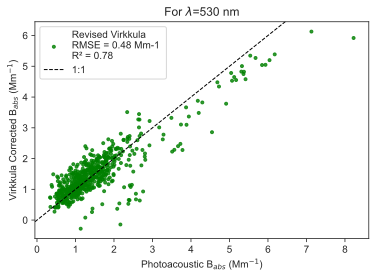

'Computing Virkulla Coefficients@660nm// Fitting k0, k1 and then Re-fitting for h0 and h1'

'k0 = 0.3110822294237614 +/- 0.005727528959219855'

'k1 = 0.027462834048471496 +/- 0.007494435040032039'

'h0 = -60.06491998426729 +/- 8.782264931769216'

'h1 = 63.303502765626874 +/- 9.102667590419594'

'Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients'

,R2,RMSE(Mm-1)
@Virkkula Prediction,0.16894,0.740827


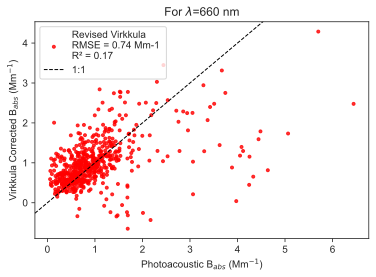

'Computing Virkulla Coefficients@467nm// Fitting k0, k1 and then Re-fitting for h0 and h1'

'k0 = 0.2923769088560053 +/- 0.008339791161934297'

'k1 = -0.01111853748496272 +/- 0.008316669435069507'

'h0 = 112.99788088188414 +/- 30.04508441894707'

'h1 = -115.6396105106583 +/- 31.018840653983183'

'Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients'

,R2,RMSE(Mm-1)
@Virkkula Prediction,0.598925,0.787112


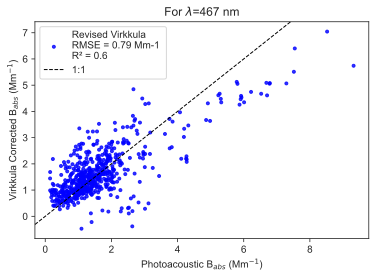

In [11]:
#4SavingResults ############## Code to SAVE Virkkula Predicted Plots@ Different Wavelenghts  ####################
#  // Change wavelenght# and _GBG# Code to get different results

# 4.1 For Green Wavelength
#####################################
# Curve Fitting //
from scipy.optimize import curve_fit

##// Discussed Virkulla Regression k0,k1 and then h0,h1
# What should be the role of s? Does it makes a difference?

display("Computing Virkulla Coefficients@530nm// Fitting k0, k1 and then Re-fitting for h0 and h1")

def func1(X, k0, k1):
    x1 = X
    return (k0 + k1*np.log(x1))

X = Combined_df["transmittance_G"]
y = Combined_df["f(Tr)@530"]

popt, pcov = curve_fit(func1, X, y)
std1 = np.sqrt(np.diag(pcov))
k0, k1 = popt

def func2(X, h0, h1):
    x1,x2 = X
    return (k0 + k1*(h0+h1*x1)*np.log(x2))

X = (Combined_df["w0@530"], Combined_df["transmittance_G"])
y = Combined_df["f(Tr)@530"]

popt, pcov = curve_fit(func2, X, y)
std2 = np.sqrt(np.diag(pcov))
h0, h1 = popt

display("k0 = "+str(k0)+" +/- "+str(std1[0]), "k1 = "+str(k1)+" +/- "+str(std1[1]), "h0 = "+str(h0)+" +/- "+str(std2[0]), "h1 = "+str(h1)+" +/- "+str(std2[1]))

# Rounding off and saving k0, k1, h0, h1 and stds
k0 = np.round(k0, 3); std1[0] = np.round(std1[0], 3);
k1 = np.round(k1, 3); std1[1] = np.round(std1[1], 3);
h0 = np.round(h0, 3); std2[0] = np.round(std2[0], 3);
h1 = np.round(h1, 3); std2[1] = np.round(std2[1], 3);
coef_G = [str(k0)+" ± "+str(std1[0]), str(k1)+" ± "+str(std1[1]), str(h0)+" ± "+str(std2[0]), str(h1)+" ± "+str(std2[1])]

# Virkulla Equation to Predict the PASS_abs
display("Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_G_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@530"]
Tr = Combined_df["transmittance_G"]
Combined_df["Ba_Virkkula@530"] = 1

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_G_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@530"], Tr = Combined_df["transmittance_G"], s = Combined_df["s@530"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula@530"]=fsolve(virkkula,Combined_df["Ba_Virkkula@530"])

# display(Combined_df["Ba_Virkkula@530"])
# display(f(Combined_df["Ba_Virkkula@530"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_G_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@530"], Tr = Combined_df["transmittance_G"], s = Combined_df["s@530"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@530"] - Combined_df["Ba_Virkkula@530"]
ss_Ges = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@530"]-np.mean(Combined_df["Ba_PASS@530"]))**2)

Virkkula_G2 = 1 - (ss_Ges / ss_tot)
Virkkula_GMSE = rmse(Combined_df["Ba_Virkkula@530"], Combined_df["Ba_PASS@530"])

metrics_df = pd.DataFrame(np.array([Virkkula_G2, Virkkula_GMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Virkkula Prediction"])
display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
# plt.scatter(Combined_df["Ba_PASS@530"], Combined_df["Ba_Virkkula@530"], label="Virkkula Prediction@530nm \nRMSE = "+str(np.round(Virkkula_GMSE, 2))+", R2 = "+str(np.round(Virkkula_G2, 2)), marker=".", color="g")
# plt.xlabel("True B_abs_PASS"); plt.ylabel("Virkkula Calculated B_abs");

plt.title("For $\lambda$=530 nm") #
sns.regplot(x="Ba_PASS@530", y="Ba_Virkkula@530", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Virkkula\nRMSE = "+str(np.round(Virkkula_GMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_G2, 2))) #
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.legend()
plt.savefig('Virkkula@530.tiff', bbox_inches='tight', dpi=600)
plt.show()



# 4.2 For Red Wavelength
#####################################
# Curve Fitting //
from scipy.optimize import curve_fit

##// Discussed Virkulla Regression k0,k1 and then h0,h1
# What should be the role of s? Does it makes a difference?

display("Computing Virkulla Coefficients@660nm// Fitting k0, k1 and then Re-fitting for h0 and h1")

def func1(X, k0, k1):
    x1 = X
    return (k0 + k1*np.log(x1))

X = Combined_df["transmittance_R"]
y = Combined_df["f(Tr)@660"]

popt, pcov = curve_fit(func1, X, y)
std1 = np.sqrt(np.diag(pcov))
k0, k1 = popt

def func2(X, h0, h1):
    x1,x2 = X
    return (k0 + k1*(h0+h1*x1)*np.log(x2))

X = (Combined_df["w0@660"], Combined_df["transmittance_R"])
y = Combined_df["f(Tr)@660"]

popt, pcov = curve_fit(func2, X, y)
std2 = np.sqrt(np.diag(pcov))
h0, h1 = popt

display("k0 = "+str(k0)+" +/- "+str(std1[0]), "k1 = "+str(k1)+" +/- "+str(std1[1]), "h0 = "+str(h0)+" +/- "+str(std2[0]), "h1 = "+str(h1)+" +/- "+str(std2[1]))

# Rounding off and saving k0, k1, h0, h1 and stds
k0 = np.round(k0, 3); std1[0] = np.round(std1[0], 3);
k1 = np.round(k1, 3); std1[1] = np.round(std1[1], 3);
h0 = np.round(h0, 3); std2[0] = np.round(std2[0], 3);
h1 = np.round(h1, 3); std2[1] = np.round(std2[1], 3);
coef_R = [str(k0)+" ± "+str(std1[0]), str(k1)+" ± "+str(std1[1]), str(h0)+" ± "+str(std2[0]), str(h1)+" ± "+str(std2[1])]

# Virkulla Equation to Predict the PASS_abs
display("Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_R_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@660"]
Tr = Combined_df["transmittance_R"]
Combined_df["Ba_Virkkula@660"] = 1

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@660"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@660"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula@660"]=fsolve(virkkula,Combined_df["Ba_Virkkula@660"])

# display(Combined_df["Ba_Virkkula@660"])
# display(f(Combined_df["Ba_Virkkula@660"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@660"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@660"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@660"] - Combined_df["Ba_Virkkula@660"]
ss_Res = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@660"]-np.mean(Combined_df["Ba_PASS@660"]))**2)

Virkkula_R2 = 1 - (ss_Res / ss_tot)
Virkkula_RMSE = rmse(Combined_df["Ba_Virkkula@660"], Combined_df["Ba_PASS@660"])

metrics_df = pd.DataFrame(np.array([Virkkula_R2, Virkkula_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Virkkula Prediction"])
display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
# plt.scatter(Combined_df["Ba_PASS@660"], Combined_df["Ba_Virkkula@660"], label="Virkkula Prediction@660nm \nRMSE = "+str(np.round(Virkkula_RMSE, 2))+", R2 = "+str(np.round(Virkkula_R2, 2)), marker=".", color="g")
# plt.xlabel("True B_abs_PASS"); plt.ylabel("Virkkula Calculated B_abs");

plt.title("For $\lambda$=660 nm") #
sns.regplot(x="Ba_PASS@660", y="Ba_Virkkula@660", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Virkkula\nRMSE = "+str(np.round(Virkkula_RMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_R2, 2))) #
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.legend()
plt.savefig('Virkkula@660.tiff', bbox_inches='tight', dpi=600)
plt.show()



# 4.3 For Blue Wavelength
#####################################
# Curve Fitting //
from scipy.optimize import curve_fit

##// Discussed Virkulla Regression k0,k1 and then h0,h1
# What should be the role of s? Does it makes a difference?

display("Computing Virkulla Coefficients@467nm// Fitting k0, k1 and then Re-fitting for h0 and h1")

def func1(X, k0, k1):
    x1 = X
    return (k0 + k1*np.log(x1))

X = Combined_df["transmittance_B"]
y = Combined_df["f(Tr)@467"]

popt, pcov = curve_fit(func1, X, y)
std1 = np.sqrt(np.diag(pcov))
k0, k1 = popt

def func2(X, h0, h1):
    x1,x2 = X
    return (k0 + k1*(h0+h1*x1)*np.log(x2))

X = (Combined_df["w0@467"], Combined_df["transmittance_B"])
y = Combined_df["f(Tr)@467"]

popt, pcov = curve_fit(func2, X, y)
std2 = np.sqrt(np.diag(pcov))
h0, h1 = popt

display("k0 = "+str(k0)+" +/- "+str(std1[0]), "k1 = "+str(k1)+" +/- "+str(std1[1]), "h0 = "+str(h0)+" +/- "+str(std2[0]), "h1 = "+str(h1)+" +/- "+str(std2[1]))

# Rounding off and saving k0, k1, h0, h1 and stds
k0 = np.round(k0, 3); std1[0] = np.round(std1[0], 3);
k1 = np.round(k1, 3); std1[1] = np.round(std1[1], 3);
h0 = np.round(h0, 3); std2[0] = np.round(std2[0], 3);
h1 = np.round(h1, 3); std2[1] = np.round(std2[1], 3);
coef_B = [str(k0)+" ± "+str(std1[0]), str(k1)+" ± "+str(std1[1]), str(h0)+" ± "+str(std2[0]), str(h1)+" ± "+str(std2[1])]

# Virkulla Equation to Predict the PASS_abs
display("Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_B_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@467"]
Tr = Combined_df["transmittance_B"]
Combined_df["Ba_Virkkula@467"] = 1

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_B_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@467"], Tr = Combined_df["transmittance_B"], s = Combined_df["s@467"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula@467"]=fsolve(virkkula,Combined_df["Ba_Virkkula@467"])

# display(Combined_df["Ba_Virkkula@467"])
# display(f(Combined_df["Ba_Virkkula@467"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_B_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@467"], Tr = Combined_df["transmittance_B"], s = Combined_df["s@467"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@467"] - Combined_df["Ba_Virkkula@467"]
ss_Bes = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@467"]-np.mean(Combined_df["Ba_PASS@467"]))**2)

Virkkula_B2 = 1 - (ss_Bes / ss_tot)
Virkkula_BMSE = rmse(Combined_df["Ba_Virkkula@467"], Combined_df["Ba_PASS@467"])

metrics_df = pd.DataFrame(np.array([Virkkula_B2, Virkkula_BMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Virkkula Prediction"])
display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
# plt.scatter(Combined_df["Ba_PASS@467"], Combined_df["Ba_Virkkula@467"], label="Virkkula Prediction@467nm \nRMSE = "+str(np.round(Virkkula_BMSE, 2))+", R2 = "+str(np.round(Virkkula_B2, 2)), marker=".", color="g")
# plt.xlabel("True B_abs_PASS"); plt.ylabel("Virkkula Calculated B_abs");

plt.title("For $\lambda$=467 nm") #
sns.regplot(x="Ba_PASS@467", y="Ba_Virkkula@467", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Virkkula\nRMSE = "+str(np.round(Virkkula_BMSE, 2))+" Mm-1 \nR\u00b2 = "+str(np.round(Virkkula_B2, 2))) #
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.legend()
plt.savefig('Virkkula@467.tiff', bbox_inches='tight', dpi=600)
plt.show()

In [12]:
display("±")

'±'

In [13]:
#5 ############## Code to SAVE Virkkula Table@ Different Wavelenghts  ####################

# Virkkula Coefficients Table // Need to run #4 for all 3 wavelenghts beforehand to get results
# !pip install dataframe_image
import pandas as pd
import dataframe_image as dfi
pd.options.display.latex.repr = True

display("Virkkula Coefficients Calculated from the DOE Dataset are:")

Coef_df = pd.DataFrame(np.array([coef_B, coef_G, coef_R]),columns=["k0", "k1", "h0", "h1"], index=["467nm", "530nm", "660nm"])
display(Coef_df)
dfi.export(Coef_df,"Virkkula Coefficients Table.tiff")


'Virkkula Coefficients Calculated from the DOE Dataset are:'

,k0,k1,h0,h1
467nm,0.292 ± 0.008,-0.011 ± 0.008,112.998 ± 30.045,-115.64 ± 31.019
530nm,0.344 ± 0.006,0.003 ± 0.007,31.644 ± 90.318,-31.835 ± 93.819
660nm,0.311 ± 0.006,0.027 ± 0.007,-60.065 ± 8.782,63.304 ± 9.103


,R$^2$,RMSE(Mm$^{-1}$)
Training@$\lambda$=660nm,0.97,0.13
Testing@$\lambda$=660nm,0.78,0.39


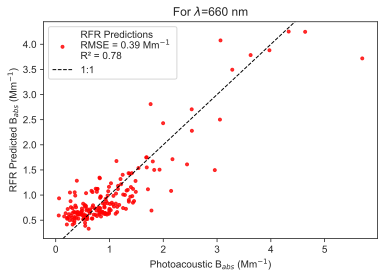

,R$^2$,RMSE(Mm$^{-1}$)
Training@$\lambda$=530nm,0.99,0.12
Testing@$\lambda$=530nm,0.93,0.26


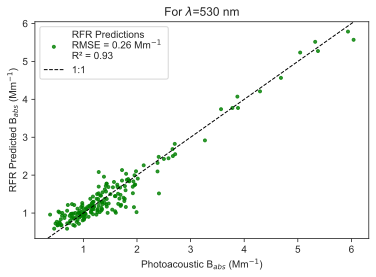

,R$^2$,RMSE(Mm$^{-1}$)
Training@$\lambda$=467nm,0.98,0.16
Testing@$\lambda$=467nm,0.88,0.47


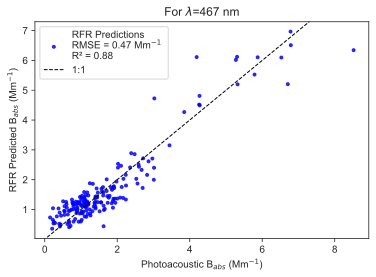

In [14]:
#6 ############## Code for Machine Learning Approach to Predict B_abs  ####################
#  // Change wavelenght# and _RBG# Code to get different results for different Wavelengths

# 6.1 For Red Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@660", "total_CDCE"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@660"
y=Combined_df["Ba_PASS@660"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@660", "total_CDCE", "Ba_PASS@660"]], hue="Ba_PASS@660")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=100) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=660nm", "Testing@$\lambda$=660nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)

plt.title("For $\lambda$=660 nm") #
sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(TestR2, 2))) #
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Predicted B$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('ML@660.tiff', bbox_inches='tight', dpi=600)
plt.show()


###############################
# 6.2 For Green Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@530", "total_CDCE"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@530"
y=Combined_df["Ba_PASS@530"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@530", "total_CDCE", "Ba_PASS@530"]], hue="Ba_PASS@530")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=100) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=530nm", "Testing@$\lambda$=530nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("For $\lambda$=530 nm") #
sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(TestR2, 2))) #
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Predicted B$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('ML@530.tiff', bbox_inches='tight', dpi=600)
plt.show()



###############################
# 6.3 For Blue Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@467", "total_CDCE"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@467"
y=Combined_df["Ba_PASS@467"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@467", "total_CDCE", "Ba_PASS@467"]], hue="Ba_PASS@467")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=100) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=467nm", "Testing@$\lambda$=467nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("For $\lambda$=467 nm") #
sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(TestR2, 2))) #
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Predicted B$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('ML@467.tiff', bbox_inches='tight', dpi=600)
plt.show()


'Running Code...'

,R$^2$,RMSE(Mm$^{-1}$)
Training@$\lambda$=532nm,1.00,16.26
Testing@$\lambda$=532nm,0.98,41.83


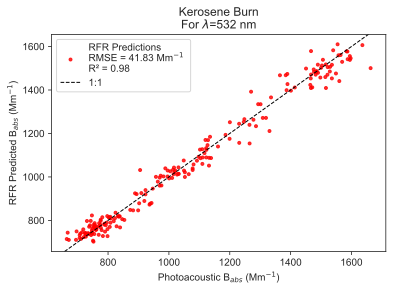

1076.1591090391607

'Running Code...'

,R$^2$,RMSE(Mm$^{-1}$)
Training@$\lambda$=405nm,1.00,13.05
Testing@$\lambda$=405nm,0.99,35.11


2021.3476222136233

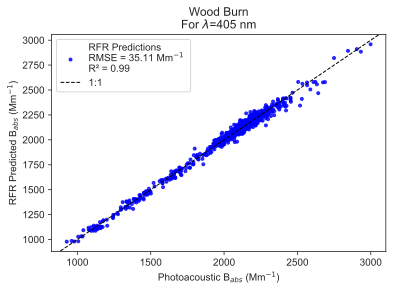

In [15]:
#7 ############## Application of RFR on Lab Burn Dataset; Code for Keroscene and Wood Burn dataset  ####################

######## 7.1 Keroscene Data
# Keroscene 532nm Data

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

###
# Creating DataFrames from Lab Burn Data files
data_df = pd.read_csv(r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\Lab Burn Data\Kerosene_532_CSV.csv', index_col=None, header=0)
display("Running Code...")
# display(data_df.shape, data_df.index, data_df.columns, data_df.head(), data_df.info(), data_df.describe())
# display(data_df.head())


###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=data_df[["N_TOTAL","GEO_MEAN", "GEO_STD", "B_ABS_TAP", "B_SCAT"]]  # Features
y=data_df["B_ABS_PA"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=100) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=532nm", "Testing@$\lambda$=532nm"])

# metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R2", "RMSE(Mm-1)"], index=["@Train_Dataset", "@Test_Dataset"])
display(metrics_df)



###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("Kerosene Burn\nFor $\lambda$=532 nm") #
sns.regplot(x=y_test, y=regressor.predict(X_test), scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(TestR2, 2))) #
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Predicted B$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('LabBurn_Kerosene_532_Plot.tiff', bbox_inches='tight', dpi=600)
plt.show()


display(y.mean())



######## 7.2 Wood Burn Data
# Wood 405nm Data

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'


###
# Creating DataFrames from CSV files
data_df = pd.read_csv(r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\DOE Project\Lab Burn Data\Wood_405_CSV.csv', index_col=None, header=0)
display("Running Code...")
# display(data_df.shape, data_df.index, data_df.columns, data_df.head(), data_df.info(), data_df.describe())
# display(data_df.head())


###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=data_df[["N_TOTAL","GEO_MEAN", "GEO_STD", "B_ABS_TAP", "B_SCAT"]]  # Features
y=data_df["B_ABS_PA"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=100) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=405nm", "Testing@$\lambda$=405nm"])

# metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R2", "RMSE(Mm-1)"], index=["@Train_Dataset", "@Test_Dataset"])
display(metrics_df)


display(y.mean())



#############################
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("Wood Burn\nFor $\lambda$=405 nm") #
sns.regplot(x=y_test, y=regressor.predict(X_test), scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(TestR2, 2))) #
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Predicted B$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('LabBurn_Wood_405_Plot.tiff', bbox_inches='tight', dpi=600)
plt.show()


